In [140]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [141]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [142]:
def plot_Solutions(PredictsList,Mean,TS,MeanRMSE,RMse,):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/preds.png")
    del fig
    gc.collect()

In [143]:
predictions = pd.read_csv("Results/iteraciones/predicions.csv" )
TS = get_TS()

In [144]:
predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [145]:
MeanRMSE = predictions['RMSE'].mean()

In [146]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [147]:
params = ['Param1','Param2','Param3','Param4','Param5']

In [148]:
meanPred = np.mean(predictions[preds])

In [149]:
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))

In [150]:
print meanPred.values
print TS[-12:-6].values

[-5.10453748  6.78498668 -0.17997588  1.3768324   0.80798056  1.09659027]
[-5.09  7.91 -1.05  1.96  0.27  0.78]


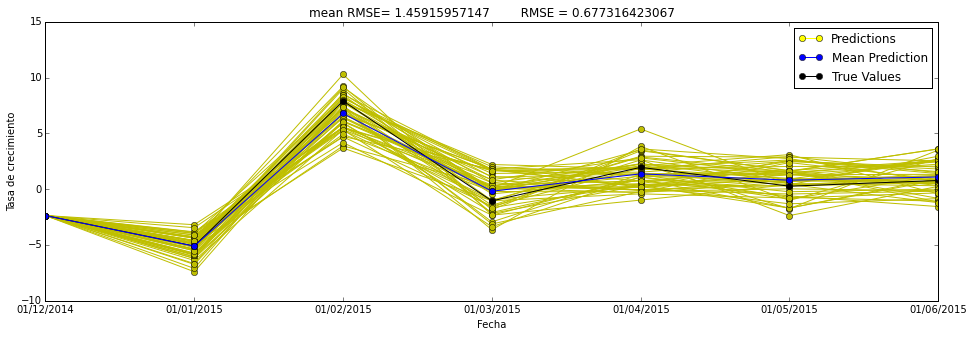

In [151]:
plot_Solutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE)

In [152]:
groupByParam1 = predictions.groupby('Param1', axis = 0)

In [153]:
groupByParam1.count()

,Param2,Param3,Param4,Param5,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,MSE,Time,RMSE
Param1,,,,,,,,,,,,,
100,29,29,29,29,29,29,29,29,29,29,29,29,29
200,7,7,7,7,7,7,7,7,7,7,7,7,7
300,14,14,14,14,14,14,14,14,14,14,14,14,14


In [154]:
groupByParam1['RMSE'].mean()

Param1
100    1.430379
200    1.527517
300    1.484598
Name: RMSE, dtype: float64

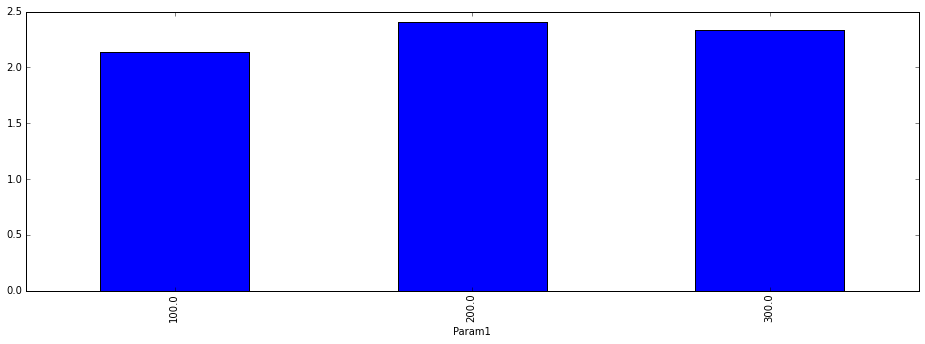

In [155]:
groupByParam1['MSE'].mean().plot(kind='bar')

In [156]:
predictions.groupby(['Param1','Param2'])['RMSE'].mean()

Param1  Param2
100     1.0       1.575869
        1.5       1.241129
        2.0       1.318557
        2.5       1.646035
        3.0       1.498825
        3.5       1.366388
        4.0       1.449486
200     1.5       1.624482
        2.5       1.478257
        3.5       1.428360
        4.0       1.630421
300     1.5       1.270111
        2.5       1.357241
        3.0       1.813209
        3.5       1.667267
        4.0       1.463559
Name: RMSE, dtype: float64

In [157]:
predictions.groupby(['Param1'])['RMSE'].max()

Param1
100    1.966886
200    1.953885
300    1.904719
Name: RMSE, dtype: float64

In [158]:
predictions['Time'].mean()

722.369859995842

In [159]:
predictions[predictions['RMSE']<1.8].count()

Param1    23
Param2    23
Param3    23
Param4    23
Param5    23
Pred1     23
Pred2     23
Pred3     23
Pred4     23
Pred5     23
Pred6     23
MSE       23
Time      23
RMSE      23
dtype: int64